In [4]:
## Here we import the required libraries to run this program.

import matplotlib as mpl
from math import log
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from random import uniform

In [ ]:
## First, we initialise the algorithm.

X1 = 1000      ## X0 in the coursework
list_X= list() ## Creation of an empty list to store the generated values of X.
time1 = list() ## Creation of an empty list to store the generated values of time.
c = 0.5        ## We set the kinetic constant to 0.5 as explained in the coursework.
t1max= 10      ## We set t1max to 10.
cnt1 = 0       ## We initialise the counter of steps to 0.         
n1max=80       ## We set the maximum number of steps to 80.
t1=0           ## We intialise the time to 0.

## Here we define the function that will return the propensity based on the kinetic constant and the h-factor.

def alpha (cdef, Xdef):
    alp=cdef*Xdef
    return alp


while t1 < t1max and cnt1 < n1max:    ## We set the conditions to break the loop.
    print(X1)                         ## We print X to see the evolution of the population.
    alpha1 = alpha(c,X1)              ## We calculate the reaction's propensity function.
    
    total_alpha=alpha1                ## As there is only one reaction within the system,
                                      ## the total propensity is equal to the reaction's propensity function.
    rn=random_nb_gen(0,1)             ## We generate one uniformly distributed pseudo-random number to compute the time for the next reaction.
    
    tau1 = (1/total_alpha)*(log(1/rn)) ## We compute the time for the next reaction
    time1.append(t1)                   ## We append the current time to the list with the time values.
    t1=t1+tau1                         ## We update the time
                     
    
    X1 = X1*exp(-c*t1)                 ## We realise the reaction.
    list_X.append(X1)                  ## We append the new population value to the list.
    cnt1=cnt1+1                        ## We update the step counter.


In [ ]:
print(t1) ## To check if the conditions were respected

In [ ]:
print(cnt1) ## To check if the conditions were respected

In [ ]:
## Here we plot the evolution of the time of reaction over the number of steps.

plt.plot(time1)
plt.xlabel('Number of steps', fontsize = 14)
plt.ylabel('Time', fontsize= 14)
plt.title('Evolution of the time of reaction over the number of steps', fontsize= 14)
plt.show()

In [ ]:
## Here we plot the evolution of the number of molecules of species X over the number of steps.

lines2 = plt.plot(list_X)
plt.setp(lines2, color='black', linewidth=1)
plt.xlabel('Number of steps', fontsize = 14)
plt.ylabel('Number of molecules of species X', fontsize= 10)
plt.title('Evolution of the number of molecules of species X over number of steps', fontsize= 14)
plt.show()

In [ ]:

## Here we plot the evolution of the number of molecules of species X over time - simulating a radioactive exponentieal decay reaction.
lines1=plt.plot(time1,list_X)
plt.setp(lines1, color='r', linewidth=1)
plt.ylabel('Number of molecules of species X', fontsize =12)
plt.xlabel('Time', fontsize =14)
plt.title('Evolution of the number of molecules of species X over time - simulating a radioactive exponentieal decay reaction')
mpl.rcParams['figure.figsize'] = 8, 3
plt.show()


In [5]:
## Here we define the function that will generate uniformly distributed pseudo-random numbers. 

def random_nb_gen(a,b):
    r=uniform(a,b)
    return r

In [6]:

## We initialise the algorithm.

tmax= 10    ## We set the tmax to 10.

n= 0       ## We set n to 0.
nmax=10**8 ## We set the nmax to 10^8.
cnt = 0    ## We initialise the counter of steps to 0.
t = 0      ## We intialise the time to 0.
X0 = 1     ## We initialise X0 to 1.

## Here we define the function that will return the propensity based on the kinetic constant and the h-factor.

def alpha (c, HX):
    alp=c*HX
    return alp



x1= list()     ## Creation of an empty list to store the generated values of X.
time = list()  ## Creation of an empty list to store the generated values of time.
time.append(0) ## We append the t0 to the list.
x1.append(1)   ## We append the X0 to the list.


while t < tmax and cnt < nmax:     ## We set the conditions to break the loop.
    
    X= x1[-1]

    ## loop to compute the reactions' propensity functions
            ## We set the kinetic constants at the values stated in the coursework.
        
    C1= 4.7876*10**4
    C2=9.9800*10**3
    C3=7.0739*10**2
    C4=16.544
    
    ## We create a list containing the different kinetic constants.

    CL = (C1, C2, C3, C4)
    
    ## We create the H-factor based on the functions written in the coursework.
    
    HX1= 1                        ## This is H1(X)
    HX2 = X                       ## This is H2(X)
    HX3 = (X*(X-1)/2)             ## This is H3(X)
    HX4 = (X*(X-1)*(X-2)/6)       ## This is H4(X)
    

    HXL = (HX1, HX2, HX3, HX4) ## We create a list containing all the h-factors.
    
    
    prop = list() ## we create a list where we will append the propensities.
    
    
    for  a,b in zip(HXL, CL):      ## This loop is used to calculate the propensities and append them to the list created above. It uses the h-factor and the corresponding kinetic constant thanks to the zip function.
        prop.append(alpha(a,b))
        
    ## We calculate the total propensity a0.
    
    total_prop = sum(prop)
    
    ## We generate two pseudo-random numbers r1 and r2.
    
    r1= random_nb_gen(0,1)
    r2= random_nb_gen(0,1)
    
    ## We compute the time for next reaction.
    
    tau = (1/total_prop)*log(1/r1)
    
    ## Here we compute mu accordint to the inequality presented in the coursework.
    
    prop_0 = prop[0]
    prop_1 = prop[1]
    prop_2 = prop[2]
    prop_3 = prop[3]
    

    if total_prop*r2 < prop_0:
        mu = 1
    elif total_prop*r2 < prop_0 + prop_1:
        mu = 2
    elif total_prop*r2 < prop_0 + prop_1 + prop_2:
        mu = 3
    elif total_prop*r2 < prop_0 + prop_1 + prop_2 + prop_3:
        mu = 4
    
    
    ## time update
    
    t=t+tau
    
    time.append(t) ## We append the time t to the list to store all the times.
    
    ## We realise the reaction:

        
    if mu == 1:
            X=1+X
    
    elif mu == 2:
            X=X-1
    
    elif mu == 3:
            X= X+1
    
    elif mu == 4:
            X=X-1
    
    ## We append the new value of X to the list with all the state of the population.

    x1.append(X)
    
    ## We update the counter of steps.
    
    cnt=cnt+1
    
    ## We delete the list created to index it properly for the next loop.
    
    del prop[:]


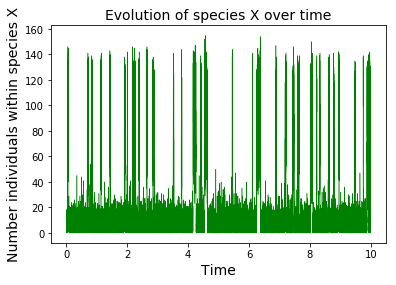

In [7]:
## We plot the evolution of species X over time.

lines = plt.plot(time, x1)
plt.setp(lines, color='g', linewidth=0.5)
plt.ylabel('Number individuals within species X', fontsize = 14)
plt.xlabel('Time', fontsize = 14)
plt.title('Evolution of species X over time', fontsize = 14)
mpl.rcParams['figure.figsize'] = 10, 19
plt.show()

In [8]:
## Here we create a DataFrame with the time and X values.

df = pd.DataFrame(np.column_stack([time, x1]), 
                               columns=['Time', 'X'])

In [9]:
## Here we find the values of time closest to (but below) the time inervals of 0.001, 0.002, until 10.

df1= df.values
list_sample = list() ## Creation of an empty list containing such times.
for i in np.arange(0.001, 5, 0.001):
    
    sample = df1[df1<i].max()
    list_sample.append(sample) ## We append the recent time found to the list. 


In [10]:
## Here we can check if the values are correct

print(list_sample)

[0.0099941064538849392, 0.019979122012663719, 0.029989678721601288, 0.039999956795015952, 0.049999809544249943, 0.059999911144792702, 0.069999976996646535, 0.07999575491930086, 0.089986697173879263, 0.099998182643600317, 0.1099850835697076, 0.11999958215809586, 0.12999537426168864, 0.13999219406656174, 0.1499986169845442, 0.15999658790843602, 0.1699995644733831, 0.17999994941889819, 0.18999448773059802, 0.19999816507222157, 0.20999401343619936, 0.21999711116703796, 0.22999359767958782, 0.23998250890143943, 0.24997713593144036, 0.2599762384586799, 0.26999867424663127, 0.27999803464505851, 0.28999794090183484, 0.29999918309324802, 0.30998408705574432, 0.31998288878630143, 0.3299723576618574, 0.33999787455733221, 0.3499967639148503, 0.359980968867671, 0.36998601399971609, 0.37996551551643537, 0.38998651696892028, 0.39999670361013118, 0.40999661528657577, 0.4199986684890008, 0.42999524451854021, 0.43997946658008824, 0.44999428549919701, 0.45999970697943815, 0.4699997337667241, 0.4799875776

In [11]:

g_final = list()                   ## We create an empty list which will contain the values of X corresponding to the times we found.

## We create a loop that finds the value of X corresponding to the time we found.

for i in list_sample:
    X_sample = df[df['Time'] == i]
    g_sample = X_sample['X'].values
    g_final.append(g_sample)
    print(X_sample)

          Time     X
1295  0.009994  10.0
          Time    X
2634  0.019979  7.0
         Time    X
3834  0.02999  5.0
       Time     X
13434  0.04  91.0
       Time     X
71407  0.05  64.0
        Time     X
127081  0.06  74.0
        Time     X
182715  0.07  90.0
            Time    X
229813  0.079996  4.0
            Time    X
231057  0.089987  6.0
            Time    X
232314  0.099998  5.0
            Time     X
233652  0.109985  11.0
        Time     X
234910  0.12  11.0
            Time    X
236184  0.129995  5.0
            Time     X
237342  0.139992  13.0
            Time    X
238556  0.149999  9.0
            Time     X
239845  0.159997  18.0
        Time     X
241095  0.17  10.0
        Time     X
242380  0.18  11.0
            Time    X
243644  0.189994  3.0
            Time    X
244883  0.199998  8.0
            Time    X
246123  0.209994  8.0
            Time    X
247438  0.219997  7.0
            Time    X
248744  0.229994  7.0
            Time    X
250075  0.239983  

In [12]:
## We print g_final to check the form of its values.

print(g_final)

## Here we realize that the object g_final is a list of array of float 64 and we cannot use such form to plot an histogram.


[array([ 10.]), array([ 7.]), array([ 5.]), array([ 91.]), array([ 64.]), array([ 74.]), array([ 90.]), array([ 4.]), array([ 6.]), array([ 5.]), array([ 11.]), array([ 11.]), array([ 5.]), array([ 13.]), array([ 9.]), array([ 18.]), array([ 10.]), array([ 11.]), array([ 3.]), array([ 8.]), array([ 8.]), array([ 7.]), array([ 7.]), array([ 6.]), array([ 2.]), array([ 2.]), array([ 6.]), array([ 7.]), array([ 12.]), array([ 7.]), array([ 6.]), array([ 4.]), array([ 5.]), array([ 4.]), array([ 4.]), array([ 4.]), array([ 6.]), array([ 6.]), array([ 5.]), array([ 6.]), array([ 8.]), array([ 3.]), array([ 5.]), array([ 4.]), array([ 3.]), array([ 8.]), array([ 4.]), array([ 6.]), array([ 5.]), array([ 6.]), array([ 4.]), array([ 6.]), array([ 6.]), array([ 1.]), array([ 10.]), array([ 4.]), array([ 6.]), array([ 7.]), array([ 9.]), array([ 7.]), array([ 7.]), array([ 9.]), array([ 9.]), array([ 2.]), array([ 9.]), array([ 7.]), array([ 4.]), array([ 4.]), array([ 3.]), array([ 75.]), array

In [13]:
## Therefore, we use this loop to create a list of integers, which is easier to deal with.


g_final_3=g_final[0].astype(int).tolist()

for i in range(1,len(list_sample)):
    g_final_1 = g_final[i].astype(int).tolist()

    g_final_3 = (g_final_3+g_final_1)
    i=i+1

## We check that the number of sample values of X and the number of samples values of time are the same using the function len().

#print(g_final_2)
print(len(g_final_3))
#print(list_sample)
print(len(list_sample))

499
499


In [ ]:
## Here we create the dataframe containing the sample values of X and of the time. We can check that is the right values witht the head() function.

df_final = pd.DataFrame(np.column_stack([list_sample, g_final_3]), 
                               columns=['Time', 'X'])
df_final.head()

In [ ]:
## Here we plot the histogram of the sample.

plt.hist(g_final_3)
plt.xlabel('Number of individuals in species X', fontsize =14)
plt.ylabel('Number of instances in the sample', fontsize =14)
plt.title('Histogram of the population sample of species X', fontsize =14)
plt.grid(True)
mpl.rcParams['figure.figsize'] = 10, 8
plt.show()

In [14]:
# mean of the sample

arrx1 = np.array(g_final_3)
sample_mean = np.mean(arrx1, axis=0)
print(sample_mean)

15.9699398798


In [15]:
# std of the sample

sample_std=np.std(arrx1, axis =0)
print(sample_std)

26.4653344216


In [16]:
# mean of the entire population

arrx = np.array(x1)
pop_mean = np.mean(arrx, axis=0)
print(pop_mean)

79.2844901332


In [17]:
# std of the entire population

pop_std = np.std(arrx, axis=0)
print(pop_std)

32.9141117213
